In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.interpolate import UnivariateSpline

In [2]:
with open("lpf_sensor_data.pkl", "rb") as f:
    sensor_data = pickle.load(f)

In [3]:
interpolation_funcs = {}

for mat in range(2):
    interpolation_funcs[f"mat_{mat}"] = {}
    for sensor in range(8):
        interpolation_funcs[f"mat_{mat}"][sensor] = {}
        for heater in range(10):
            heater_step = sensor_data[f"mat_{mat}"][sensor][heater]
            filtered = heater_step["Filtered"].values
            time = heater_step["Time Since PowerOn"].values
            interpolation_func = UnivariateSpline(time, filtered, s=0)
            interpolation_funcs[f"mat_{
                mat}"][sensor][heater] = interpolation_func
            print(mat, sensor, heater)
        print("-" * 50)

0 0 0
0 0 1
0 0 2
0 0 3
0 0 4
0 0 5
0 0 6
0 0 7
0 0 8
0 0 9
--------------------------------------------------
0 1 0
0 1 1
0 1 2
0 1 3
0 1 4
0 1 5
0 1 6
0 1 7
0 1 8
0 1 9
--------------------------------------------------
0 2 0
0 2 1
0 2 2
0 2 3
0 2 4
0 2 5
0 2 6
0 2 7
0 2 8
0 2 9
--------------------------------------------------
0 3 0
0 3 1
0 3 2
0 3 3
0 3 4
0 3 5
0 3 6
0 3 7
0 3 8
0 3 9
--------------------------------------------------
0 4 0
0 4 1
0 4 2
0 4 3
0 4 4
0 4 5
0 4 6
0 4 7
0 4 8
0 4 9
--------------------------------------------------
0 5 0
0 5 1
0 5 2
0 5 3
0 5 4
0 5 5
0 5 6
0 5 7
0 5 8
0 5 9
--------------------------------------------------
0 6 0
0 6 1
0 6 2
0 6 3
0 6 4
0 6 5
0 6 6
0 6 7
0 6 8
0 6 9
--------------------------------------------------
0 7 0
0 7 1
0 7 2
0 7 3
0 7 4
0 7 5
0 7 6
0 7 7
0 7 8
0 7 9
--------------------------------------------------
1 0 0
1 0 1
1 0 2
1 0 3
1 0 4
1 0 5
1 0 6
1 0 7
1 0 8
1 0 9
--------------------------------------------------
1

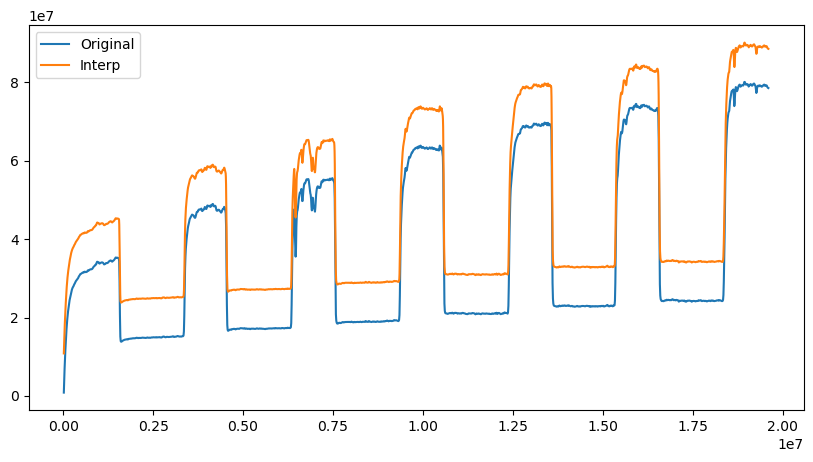

In [4]:
mat = 1
sensor = 2
heater_step = 5
heater = sensor_data[f"mat_{mat}"][sensor][heater_step]
gas_data = heater["Filtered"].values
time = heater["Time Since PowerOn"].values
interpolation_func = interpolation_funcs[f"mat_{mat}"][sensor][heater_step]
interpolated_time = np.linspace(time[0], time[-1], len(time) * 2)
interpolated_data = interpolation_func(interpolated_time)

plt.figure(figsize=(10, 5))
plt.plot(time, gas_data, label="Original")
plt.plot(interpolated_time, interpolated_data + 1e7, label="Interp")
# plt.yscale("log")
plt.legend()
plt.show()

In [5]:
with open("interpolation_functions.pkl", "wb") as f:
    pickle.dump(interpolation_funcs, f)